# Importing Packages

In [1]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
crop.shape

(2200, 8)

In [4]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
crop.duplicated().sum()

0

In [7]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Plotting the scatter plot between independent and dependent variable

Text(0.5, 0, 'Crop')

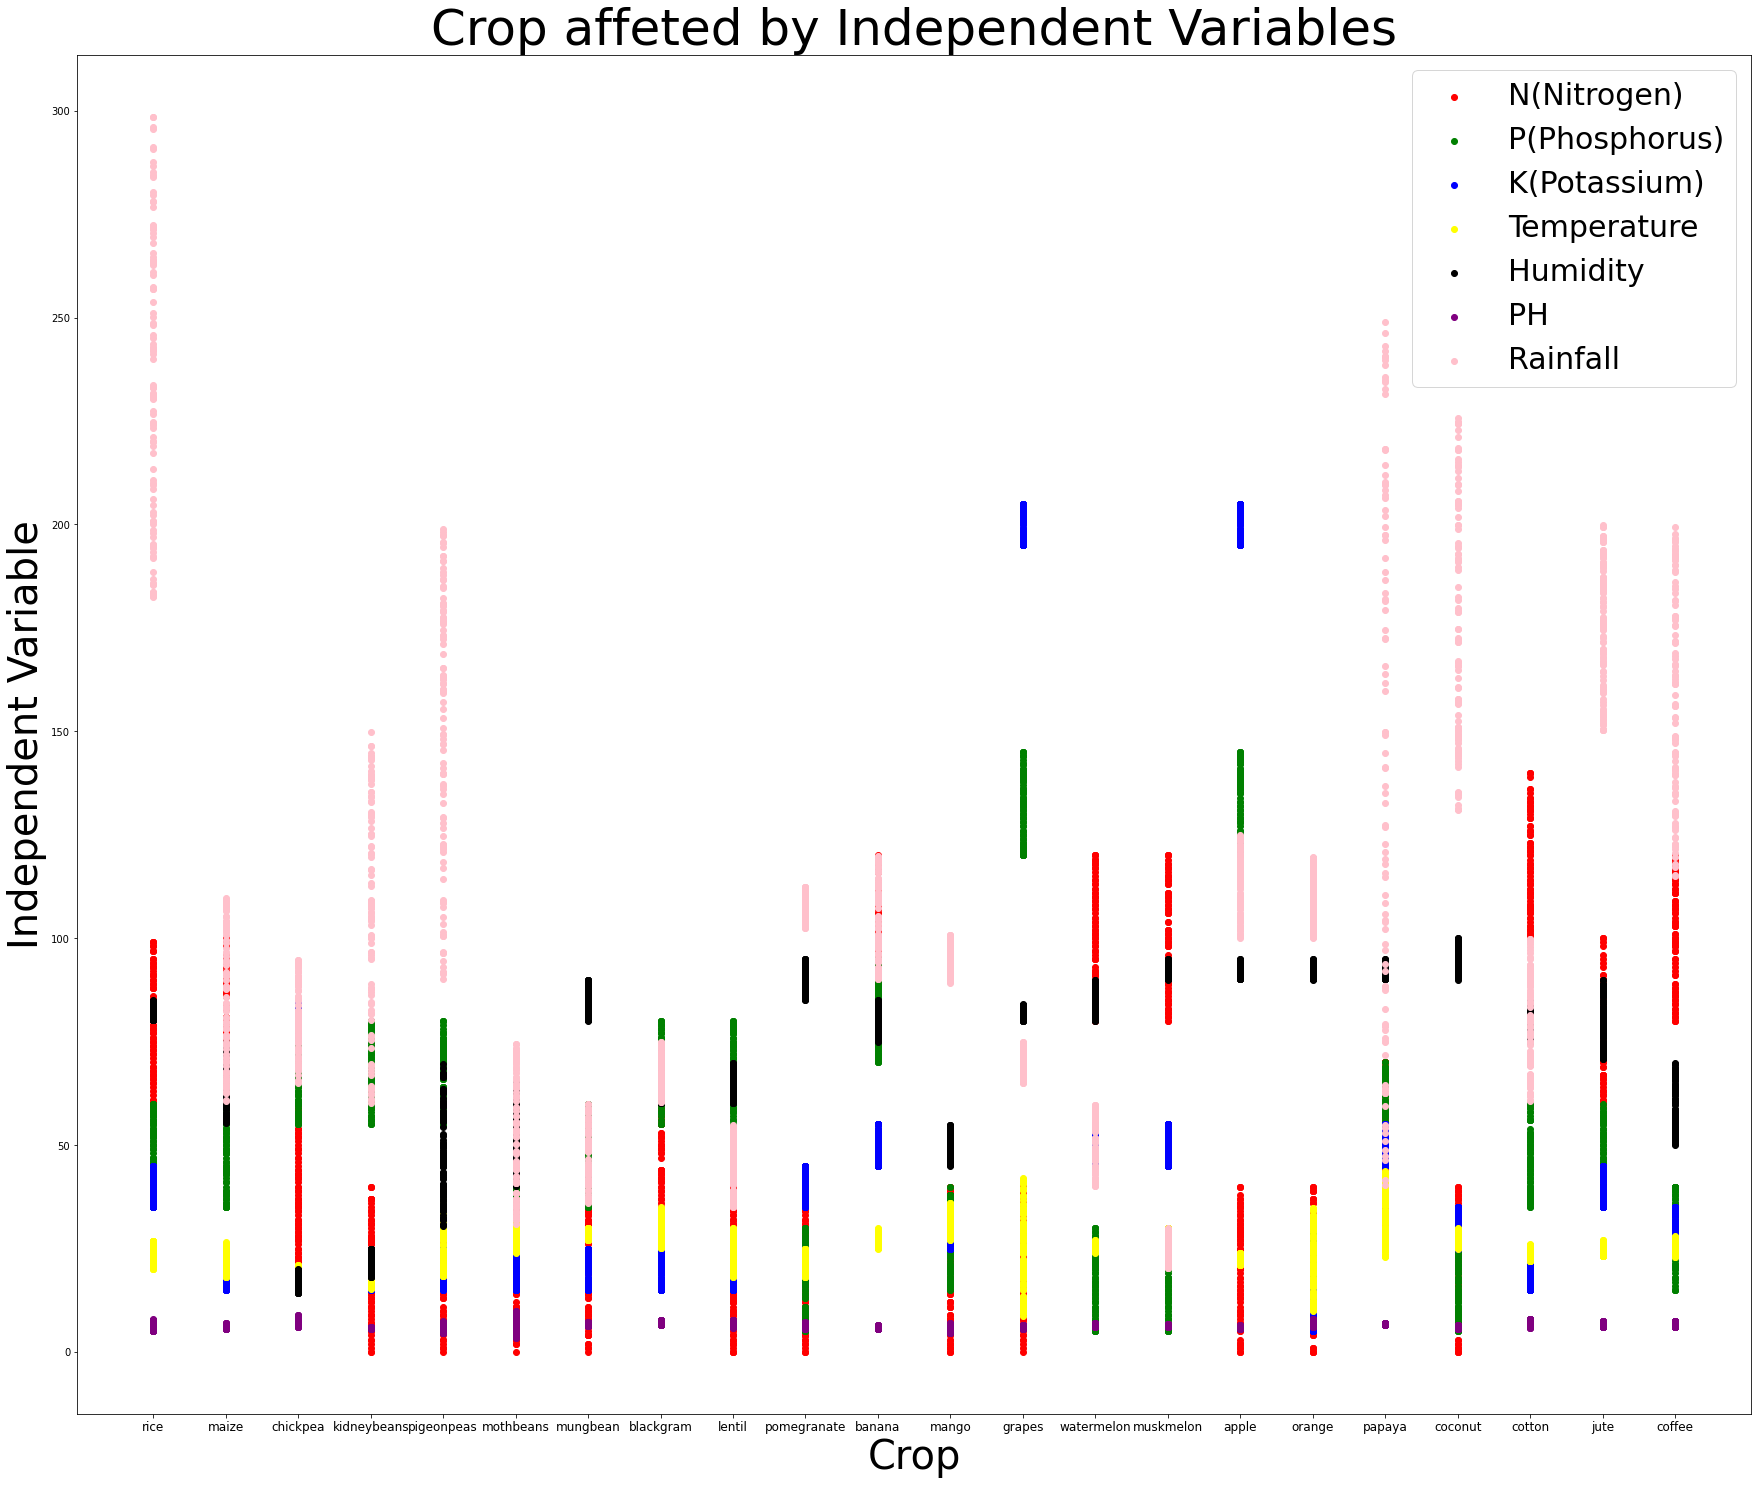

In [8]:
plt.figure(figsize=(30,25))
plt.scatter(crop.label,crop.N,color='red', label='N(Nitrogen)')
plt.scatter(crop.label,crop.P,color='green', label='P(Phosphorus)')
plt.scatter(crop.label,crop.K,color='blue', label='K(Potassium)')
plt.scatter(crop.label,crop.temperature,color='yellow', label='Temperature')
plt.scatter(crop.label,crop.humidity,color='black', label='Humidity')
plt.scatter(crop.label,crop.ph,color='purple', label='PH')
plt.scatter(crop.label,crop.rainfall,color='pink', label='Rainfall')

plt.legend(fontsize=30)
plt.xticks(fontsize=12)
plt.ylabel('Independent Variable',fontsize=40)
plt.title('Crop affeted by Independent Variables',fontsize=50)
plt.xlabel('Crop',fontsize=40)

# Exploring Data

In [9]:
corr = crop.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<AxesSubplot:>

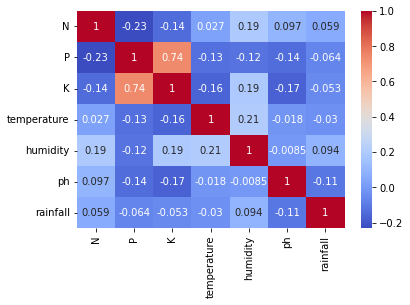

In [10]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm')

In [11]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

# Encoding

In [12]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=crop['label'].map(crop_dict)

In [13]:
crop['crop_num'].value_counts()

1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: crop_num, dtype: int64

In [14]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [15]:
correlation = crop.corr()['crop_num']
correlation

N             -0.317076
P              0.109993
K             -0.089209
temperature   -0.031383
humidity      -0.640925
ph             0.057527
rainfall      -0.311053
crop_num       1.000000
Name: crop_num, dtype: float64

In [16]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22


In [17]:
crop=crop.drop('label',axis=1)

# Train Test Split

In [18]:
X=crop.iloc[:,:-1]
y = crop['crop_num']

In [19]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [20]:
y.shape

(2200,)

In [21]:
X_affect=crop.drop(['K','temperature','ph'],axis=1)
X_affect

,N,P,humidity,rainfall,crop_num
0,90,42,82.002744,202.935536,1
1,85,58,80.319644,226.655537,1
2,60,55,82.320763,263.964248,1
3,74,35,80.158363,242.864034,1
4,78,42,81.604873,262.717340,1
...,...,...,...,...,...
2195,107,34,66.413269,177.774507,22
2196,99,15,56.636362,127.924610,22
2197,118,33,67.225123,173.322839,22
2198,117,32,52.127394,127.175293,22


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_affect_train,X_affect_test,y_affect_train,y_affect_test=train_test_split(X_affect, y, test_size=0.2, random_state=42)

In [24]:
X_train.shape

(1760, 7)

In [25]:
X_test.shape

(440, 7)

In [26]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


# Applying Linear Regression 

In [27]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg

LinearRegression()

In [28]:
reg.fit(X_train,y_train)

LinearRegression()

In [29]:
reg.coef_

array([-0.03274523, -0.00654356,  0.0052462 ,  0.12455885, -0.17647605,
        0.48242676, -0.0260144 ])

In [30]:
reg.intercept_

22.239970808294544

In [31]:
score=reg.score(X_train,y_train)
score

0.5165897477162915

In [32]:
score_test=reg.score(X_test,y_test)
score_test

0.5302166072757792

# Applying linear regression after removing columns according to coorelation with dependent variable

In [33]:
reg_best=LinearRegression()
reg_best

LinearRegression()

In [34]:
reg_best.fit(X_affect_train,y_affect_train)

LinearRegression()

In [35]:
reg_best.coef_

array([9.45364731e-17, 2.77555756e-17, 7.21670651e-17, 2.85759601e-17,
       1.00000000e+00])

In [36]:
reg_best.intercept_

-3.019806626980426e-14

In [37]:
score_best=reg_best.score(X_affect_train,y_affect_train)
score_best

1.0

In [38]:
score_test_best=reg_best.score(X_affect_test,y_affect_test)
score_test_best

1.0

# Scale the features using MinMaxScaler and apply linear regression

In [39]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
scaled_crop=pd.DataFrame(ms.fit_transform(crop.iloc[:,:-1]),columns=crop.iloc[:,:-1].columns)
scaled_crop
X = scaled_crop
y = crop['crop_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg
reg.fit(X_train,y_train)
print(reg.intercept_)
print(reg.coef_)
score_train=reg.score(X_train,y_train)
print(score_train)
score_test=reg.score(X_test,y_test)
print(score_test)


21.98159968954794
[ -4.58433264  -0.916099     1.04924025   4.34085345 -15.12820409
   3.10216734  -7.24107828]
0.5165897477162915
0.5302166072757792


# Applying linear regression after removing columns according to coorelation with dependent variable on scaled data

In [40]:
X_affect=scaled_crop.drop(['K','temperature','ph'],axis=1)
X_affect_train,X_affect_test,y_affect_train,y_affect_test=train_test_split(X_affect, y, test_size=0.2, random_state=42)

reg=LinearRegression()
reg
reg.fit(X_affect_train,y_affect_train)
print(reg.intercept_)
print(reg.coef_)
score_affect_train=reg.score(X_affect_train,y_affect_train)
print(score_affect_train)
score_affect_test=reg.score(X_affect_test,y_affect_test)
print(score_affect_test)

25.274203235153564
[ -4.55432647  -0.58649059 -14.42925628  -7.70734598]
0.5047752170604018
0.528694224166727


# Training Models

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt=DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [43]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
ypred = dt.predict(X_test)
ypred

array([ 9, 10,  6,  6,  8, 12,  8, 18, 17, 15, 16,  5, 14,  3,  5, 14,  8,
        2,  6,  9, 22,  6,  7,  6, 21,  3, 17,  7, 19,  1, 14, 18,  3, 15,
        3, 16,  3, 21, 21, 20,  6, 12, 16,  2, 17,  2, 19,  5,  9,  2, 16,
       22, 11, 17, 22, 20,  4,  8, 13, 16, 10,  5, 15,  7,  6, 19,  7,  1,
        9, 19,  9,  5,  3, 13, 16,  6, 13,  4, 10,  7, 22, 21,  1, 18,  7,
       12, 22, 18, 16, 14,  2, 18,  4,  6, 19, 18, 20, 22, 16, 15,  5,  1,
        7,  9, 10, 20, 10, 13, 19, 18, 13,  3,  4, 14, 19, 21,  2,  5, 14,
        1, 19, 11, 16,  5, 21, 16,  5,  2, 13, 18, 13, 20, 14, 21,  5,  7,
       19, 13, 13,  8, 20,  9, 17, 18,  5,  5,  8,  5, 20, 16, 17, 15, 10,
       17, 19, 19, 19, 20,  2,  3, 21,  8,  7,  4,  1,  5, 11, 15, 10, 11,
       11, 16, 14, 21,  5,  2, 15, 11, 10,  3, 22, 22, 20,  3, 18, 20, 13,
       20,  5,  6,  6, 17, 12, 14, 10, 20,  2,  8, 16, 21, 11, 11, 13,  4,
        1, 14, 17, 13,  3, 17,  2, 21, 21, 21,  8,  1, 20,  6, 22, 16, 20,
       12, 12,  5,  6,  8

In [45]:
accuracy_score(y_test,ypred)

0.9863636363636363

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

[[17  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [47]:
compared_values = pd.DataFrame({'Actual': y_test, 'Predicted': ypred})
compared_values

,Actual,Predicted
1451,9,9
1334,10,10
1761,6,6
1735,6,6
1576,8,8
...,...,...
59,1,1
71,1,1
1908,4,4
1958,4,4


# Predicticting values on the basis of decision tree model

In [48]:
def recommendation_decision_tree(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    prediction = dt.predict(features).reshape(1,-1)
    return prediction[0] 


In [49]:
N = 100
P = 40
k = 43
temperature = 40
humidity = 100
ph = 5
rainfall = 100

predict = recommendation_decision_tree(N,P,k,temperature,humidity,ph,rainfall)


crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")
    

Apple is a best crop to be cultivated 


c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
